In [1]:
import sys
sys.path.append("..")

# backends
from qiskit.providers.fake_provider import Fake27QPulseV1,Fake5QV1,Fake20QV1
from qiskit_ibm_runtime.fake_provider import FakeGuadalupeV2


# poly_sabre
from isl_sabre.poly_circuit_preprocess import *
from isl_sabre.poly_circuit_utils import *
from isl_sabre.poly_sabre import POLY_SABRE


# qiskit
# qiskit
from qiskit import QuantumCircuit, transpile
from qiskit.transpiler.passes import SabreLayout, SabreSwap
from qiskit.transpiler import PassManager
from qiskit.transpiler import CouplingMap


In [2]:
edges = FakeGuadalupeV2().configuration().coupling_map

In [3]:
file_path = "../benchmarks/polyhedral/ibmqx/4gt4-v0_72.json"
data = json_file_to_isl(file_path)
poly_sabre = POLY_SABRE(edges,data)

In [4]:
swaps = poly_sabre.run(huristic_method="poly-paths",num_iter=1)
print("swaps",swaps)

57
swaps 57


In [5]:
swaps = poly_sabre.run(huristic_method="decay",num_iter=1)
print("swaps",swaps)

62
70
68
swaps 62


In [6]:
#swaps = poly_sabre.run(huristic_method="multi-layer-decay")
#print("swaps",swaps)    

65
66
64
swaps 64


In [6]:
def run_sabre(data):
    circuit = QuantumCircuit.from_qasm_str(data["qasm_code"])
    coupling_map = CouplingMap(edges)

    sabre_layout = SabreLayout(coupling_map,seed=21)
    pm_initial_layout = PassManager(sabre_layout)
    mapped_circuit = pm_initial_layout.run(circuit)

    sabre_swap = SabreSwap(coupling_map,seed=21)
    pm_swap = PassManager(sabre_swap)
    routed_circuit = pm_swap.run(mapped_circuit)

    swap_count = routed_circuit.count_ops().get('swap', 0)
    return swap_count

In [7]:
run_sabre(data)

63

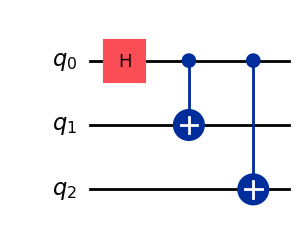

In [9]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)

qc.draw('mpl')

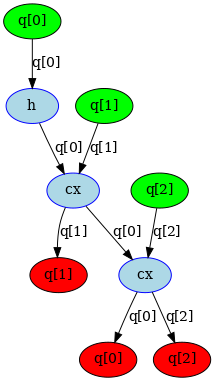

In [10]:
from qiskit.converters import circuit_to_dag
dag = circuit_to_dag(qc)
dag.draw()